In [1]:
import numpy as np
import matplotlib.pyplot as plt

name_str='input100sample{}.npz'
sample_list = np.arange(50,150,10)
std_w_range = np.arange(0.001,0.4,0.06)
axis_std_w1 = np.arange(0, 1, 0.1)
axis_std_w2 = np.arange(0, 1, 0.1)
std_w1_axis, std_w2_axis = np.meshgrid(axis_std_w1,axis_std_w2)
accuracy_10_samples = np.zeros((10,10,10))


0.84765625
0.9296875
0.9140625
0.8593750000000001
0.9453125
0.84765625
0.93359375
0.8906249999999999
0.89453125
0.90234375


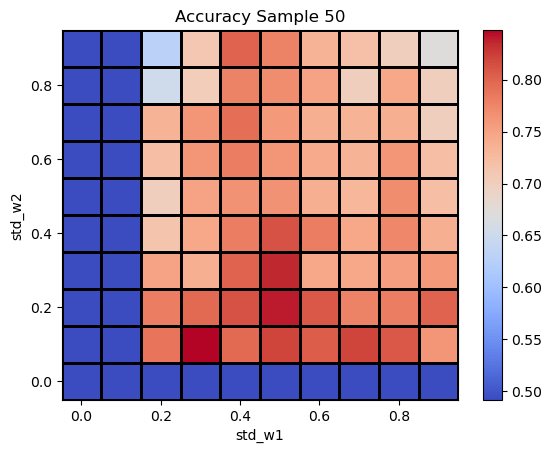

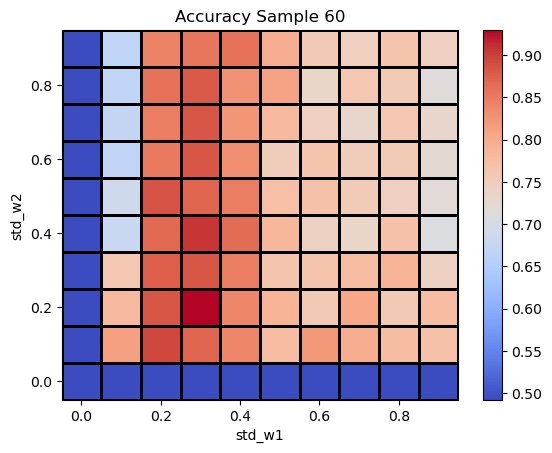

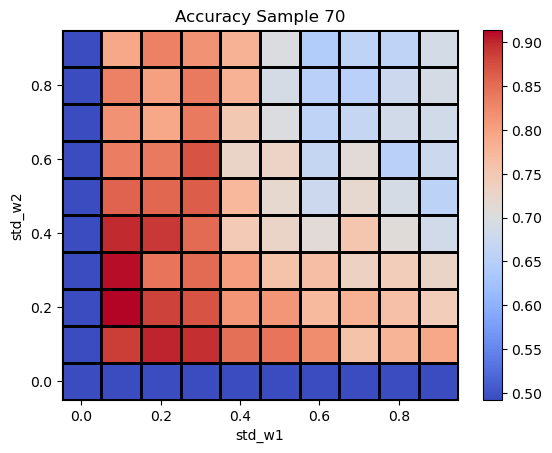

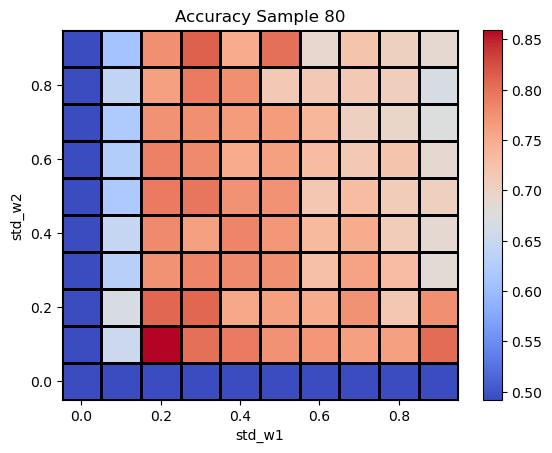

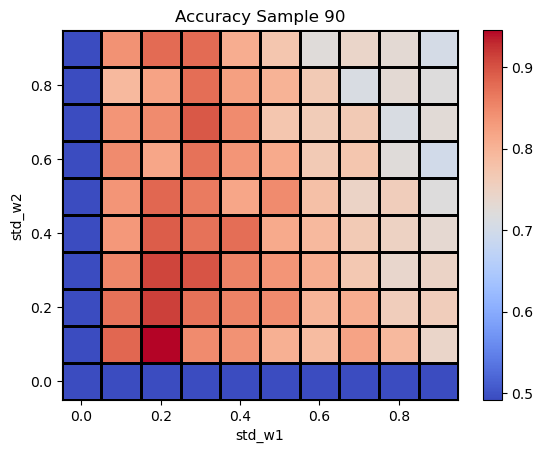

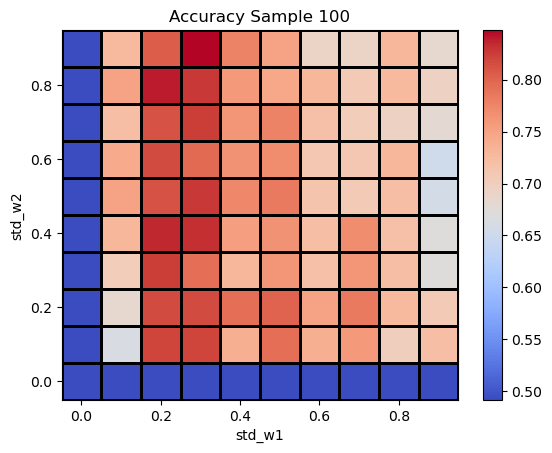

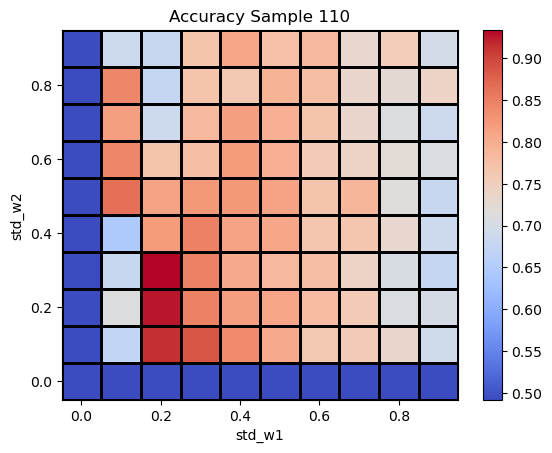

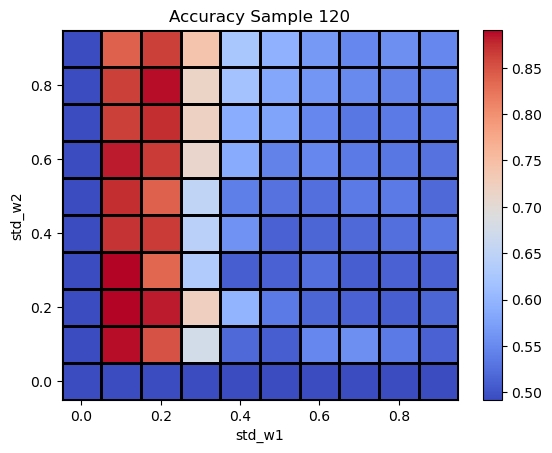

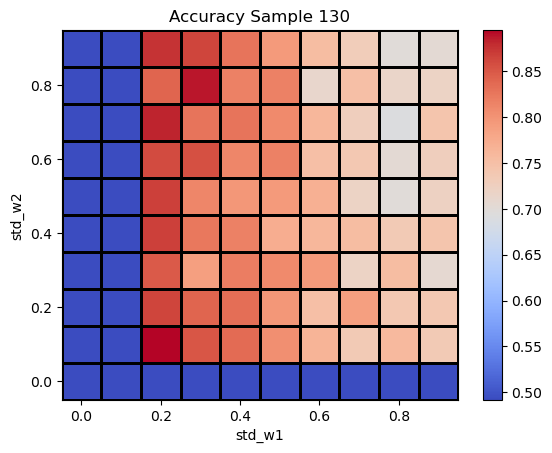

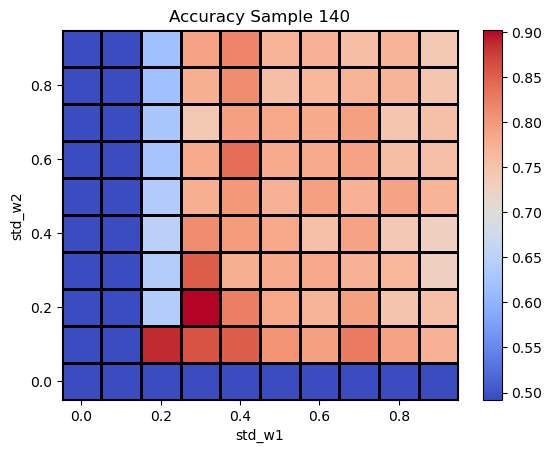

In [2]:
for (i,sample) in enumerate(sample_list):
    data = np.load(name_str.format(sample))
    fig = plt.figure()
    ax = plt.axes()
    b = ax.pcolormesh(axis_std_w1, axis_std_w2, data['accuracy_w1_w2'].T*100, cmap ='coolwarm', edgecolor='k')
    plt.colorbar(b)
    ax.set_xlabel('std_w1')
    ax.set_ylabel('std_w2')
    ax.set_title('Accuracy Sample {}'.format(sample))
    fig.savefig("input100=accuracy_w1_w2_sample{}.png".format(sample))
    for (j,std_w1) in enumerate(axis_std_w1):
        for (k,std_w2) in enumerate(axis_std_w2):
            accuracy_10_samples[i][j][k]= data['accuracy_w1_w2'][j][k]*100
    max_accuracy = np.max(accuracy_10_samples[i])
    index_max_accuracy = np.argmax(accuracy_10_samples[i])
    test_best_w1_w2 = np.unravel_index(index_max_accuracy, accuracy_10_samples[i].shape)
    test_best_w1_best_w2 = (np.array(test_best_w1_w2)+np.array([0.5,0.5]))*0.015+0.005
    print(max_accuracy)



In [3]:
average_accuracy_grid_10_by_10_10_samples = np.mean(accuracy_10_samples, axis=0)
std_dev_accuracy_grid_10_by_10_10_samples = np.std(accuracy_10_samples, axis=0)

In [4]:
average_accuracy_grid_10_by_10_10_samples

array([[0.4921875 , 0.4921875 , 0.4921875 , 0.4921875 , 0.4921875 ,
        0.4921875 , 0.4921875 , 0.4921875 , 0.4921875 , 0.4921875 ],
       [0.4921875 , 0.69335938, 0.69960937, 0.69023437, 0.67773438,
        0.69648438, 0.6921875 , 0.68242187, 0.68671875, 0.6640625 ],
       [0.4921875 , 0.87578125, 0.83984375, 0.8234375 , 0.81835938,
        0.80859375, 0.79570312, 0.78828125, 0.77539062, 0.78007812],
       [0.4921875 , 0.83554688, 0.840625  , 0.80703125, 0.80976563,
        0.80390625, 0.80898437, 0.80546875, 0.80664062, 0.80859375],
       [0.4921875 , 0.79023438, 0.79375   , 0.77304688, 0.77890625,
        0.77109375, 0.775     , 0.77695313, 0.77539062, 0.7859375 ],
       [0.4921875 , 0.7734375 , 0.77773437, 0.76210937, 0.75507813,
        0.75703125, 0.75234375, 0.75234375, 0.74804688, 0.75273437],
       [0.4921875 , 0.7609375 , 0.74492187, 0.74101562, 0.728125  ,
        0.72539062, 0.721875  , 0.72226563, 0.71640625, 0.71210938],
       [0.4921875 , 0.75898438, 0.7582031

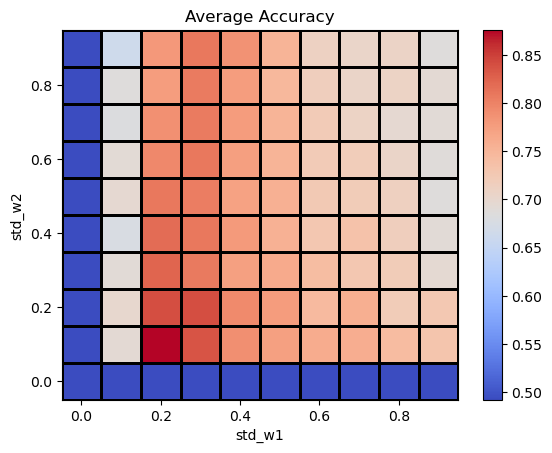

In [5]:
fig = plt.figure()
ax = plt.axes()
a = ax.pcolormesh(axis_std_w1, axis_std_w2, average_accuracy_grid_10_by_10_10_samples.T, cmap ='coolwarm', edgecolors='k')
plt.colorbar(a)
ax.set_xlabel('std_w1')
ax.set_ylabel('std_w2')
ax.set_title('Average Accuracy')


fig.savefig("average_accuracy_grid_100.png".format(sample))

0.87578125
0.4921875


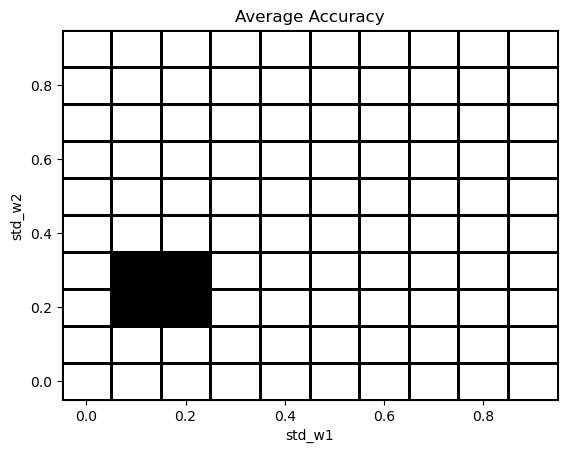

In [6]:
print(np.max(average_accuracy_grid_10_by_10_10_samples))
max_value=np.max(average_accuracy_grid_10_by_10_10_samples)
print(np.min(average_accuracy_grid_10_by_10_10_samples))
min_value=np.min(average_accuracy_grid_10_by_10_10_samples)
range_value=max_value-min_value
threshold=0.89
result_filter=average_accuracy_grid_10_by_10_10_samples >= threshold*range_value+min_value
fig = plt.figure()
ax = plt.axes()
a = ax.pcolormesh(axis_std_w1, axis_std_w2, result_filter, cmap ='binary', edgecolors='k')
ax.set_xlabel('std_w1')
ax.set_ylabel('std_w2')
ax.set_title('Average Accuracy')

fig.savefig("threshold=0.9_average_accuracy_input100.png")

(0.0, 1.0)

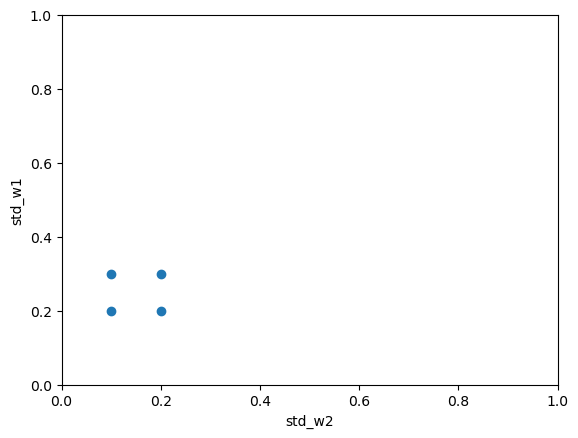

In [7]:
# get the indices where data is 1
x,y = np.argwhere(result_filter == 1).T

plt.scatter(y*0.1,x*0.1)
plt.xlabel("std_w2")
plt.ylabel("std_w1")
plt.xlim(0,1)
plt.ylim(0,1)



In [8]:
L_xx = np.sum((0.1*x)**2)-((np.sum(0.1*x))**2/x.size)

In [9]:
L_yy = np.sum((0.1*y)**2)-((np.sum(0.1*y))**2/y.size)

In [10]:
L_xy = np.sum(0.1*x*0.1*y) - ((np.sum(0.1*x))*(np.sum(0.1*y))/x.size)

In [11]:
r = L_xy/np.sqrt(L_xx*L_yy)

In [12]:
r

0.0

In [13]:
np.corrcoef(0.1*y,0.1*x)

array([[1.00000000e+00, 4.33680869e-17],
       [4.33680869e-17, 1.00000000e+00]])